In [115]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.graphics.tsaplots import plot_acf

style.use("ggplot")

In [89]:
%run Data_cleaning.ipynb

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8599212 entries, 0 to 8599211
Data columns (total 7 columns):
 #   Column                         Dtype         
---  ------                         -----         
 0   dt                             datetime64[ns]
 1   AverageTemperature             float64       
 2   AverageTemperatureUncertainty  float64       
 3   City                           object        
 4   Country                        object        
 5   Latitude                       object        
 6   Longitude                      object        
dtypes: datetime64[ns](1), float64(2), object(4)
memory usage: 459.2+ MB


In [90]:
df_budapest

,dt,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude,Year,Month,Day
1174550,1850-02-01,1.144,1.504,Budapest,Hungary,47.42N,20.13E,1850,2,1
1174551,1850-03-01,1.315,2.816,Budapest,Hungary,47.42N,20.13E,1850,3,1
1174552,1850-04-01,10.308,2.344,Budapest,Hungary,47.42N,20.13E,1850,4,1
1174553,1850-05-01,15.900,1.253,Budapest,Hungary,47.42N,20.13E,1850,5,1
1174554,1850-06-01,20.252,1.025,Budapest,Hungary,47.42N,20.13E,1850,6,1
...,...,...,...,...,...,...,...,...,...,...
1176508,2013-04-01,12.316,0.326,Budapest,Hungary,47.42N,20.13E,2013,4,1
1176509,2013-05-01,16.866,0.327,Budapest,Hungary,47.42N,20.13E,2013,5,1
1176510,2013-06-01,20.253,0.238,Budapest,Hungary,47.42N,20.13E,2013,6,1
1176511,2013-07-01,22.546,0.448,Budapest,Hungary,47.42N,20.13E,2013,7,1


In [91]:
df_budapest['Rolling_Avg'] = df_budapest['AverageTemperature'].rolling(window=240).mean()
avg_temperature_pivot = pd.pivot_table(df_budapest, values="AverageTemperature", index = "Year",fill_value=0,aggfunc="mean")
avg_temperature_pivot_moving_avarage = pd.pivot_table(df_budapest, values="Rolling_Avg" , index="Year", fill_value=0, aggfunc = "mean")
x1 = avg_temperature_pivot.index
y1 = avg_temperature_pivot["AverageTemperature"]
x2 = avg_temperature_pivot_moving_avarage.index
y2 = avg_temperature_pivot_moving_avarage["Rolling_Avg"]

In [92]:
def visualization_function(x_label, y_label , title, legendlist, legendloc,  xticksrotation) -> plt.figure: 
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.title(title , fontsize=12)
    plt.legend(legendlist, loc = legendloc)
    plt.xticks(rotation = xticksrotation, ha = "right")
    plt.grid(True)
    plt.show()

###  Let's find out whether Budapest has become warmer or colder

C:\Users\Bánki Attila\AppData\Local\Temp\ipykernel_15072\3641711395.py:3: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b-" (-> color='b'). The keyword argument will take precedence.
  plt.plot(x2,y2, "b-", color='blue')


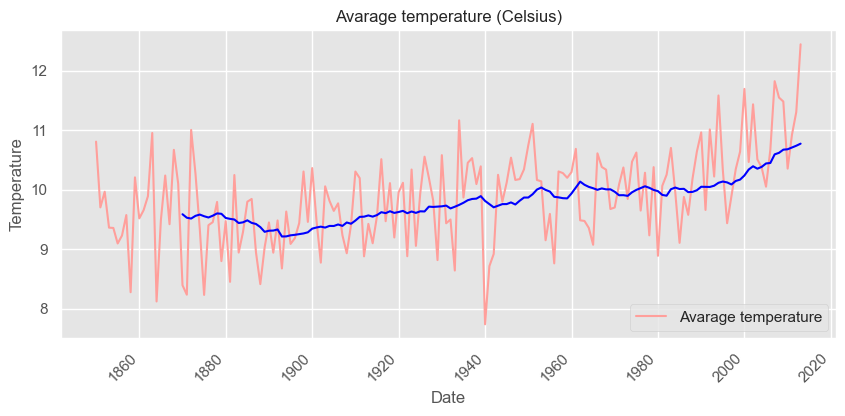

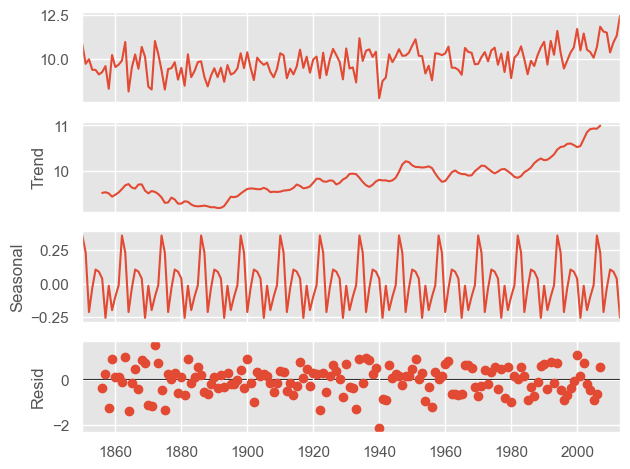

In [93]:
plt.figure(figsize= (10,4))
plt.plot(x1,y1, "r-")
plt.plot(x2,y2, "b-", color='blue')
visualization_function("Date","Temperature","Avarage temperature (Celsius)", ["Avarage temperature"], "lower right", 45)
result = seasonal_decompose(avg_temperature_pivot, model='additive', period=12)
result.plot()
plt.show()



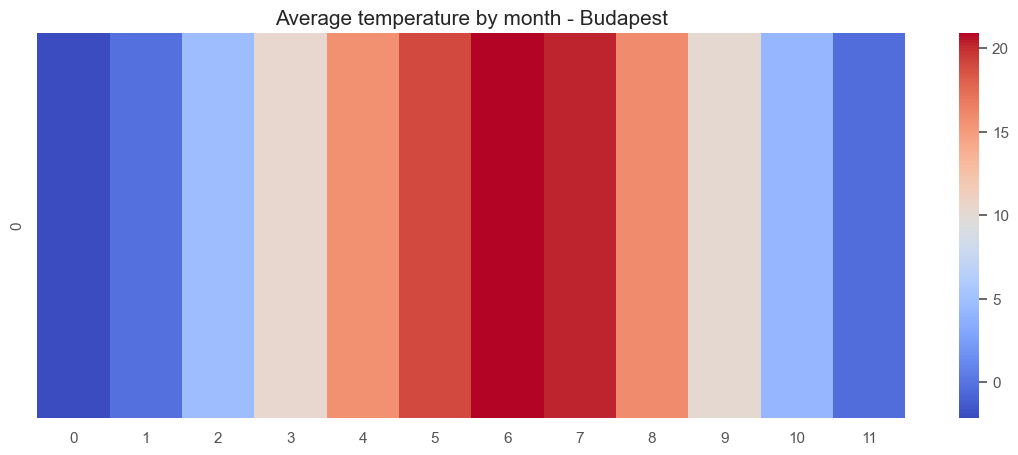

In [94]:
monthly_avg = df_budapest.groupby('Month')['AverageTemperature'].mean()
plt.figure(figsize=(14,5))
sns.heatmap(monthly_avg.values.reshape(1,12), cmap='coolwarm', annot=False, cbar=True)
plt.title('Average temperature by month - Budapest', fontsize=15)
plt.show()

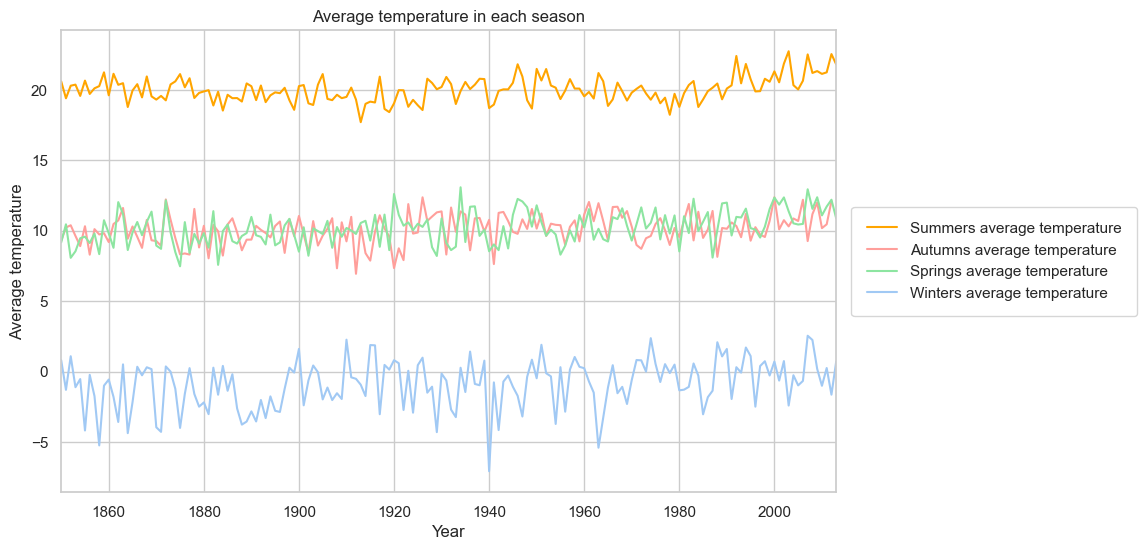

In [95]:

def get_season(month):
    if month >= 3 and month <= 5:
        return 'spring'
    elif month >= 6 and month <= 8:
        return 'summer'
    elif month >= 9 and month <= 11:
        return 'autumn'
    else:
        return 'winter'
    
min_year = df_budapest['Year'].min()
max_year = df_budapest['Year'].max()
years = range(min_year, max_year + 1)

df_budapest['season'] = df_budapest['Month'].apply(get_season)

spring_temps = []
summer_temps = []
autumn_temps = []
winter_temps = []

for year in years:
    curr_years_data = df_budapest[df_budapest['Year'] == year]
    spring_temps.append(curr_years_data[curr_years_data['season'] == 'spring']['AverageTemperature'].mean())
    summer_temps.append(curr_years_data[curr_years_data['season'] == 'summer']['AverageTemperature'].mean())
    autumn_temps.append(curr_years_data[curr_years_data['season'] == 'autumn']['AverageTemperature'].mean())
    winter_temps.append(curr_years_data[curr_years_data['season'] == 'winter']['AverageTemperature'].mean())

sns.set(style="whitegrid")
sns.set_color_codes("pastel")
f, ax = plt.subplots(figsize=(10, 6))

plt.plot(years, summer_temps, label='Summers average temperature', color='orange')
plt.plot(years, autumn_temps, label='Autumns average temperature', color='r')
plt.plot(years, spring_temps, label='Springs average temperature', color='g')
plt.plot(years, winter_temps, label='Winters average temperature', color='b')

plt.xlim(min_year, max_year)

ax.set_ylabel('Average temperature')
ax.set_xlabel('Year')
ax.set_title('Average temperature in each season')
legend = plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), frameon=True, borderpad=1, borderaxespad=1)

### Making a predictions to confirm the hypothesis

In [96]:
df_budapest = df_budapest.groupby('Year')['AverageTemperature'].mean().reset_index()
corr_matrix = df_budapest.corr(numeric_only=True)
corr_matrix

,Year,AverageTemperature
Year,1.00000,0.48885
AverageTemperature,0.48885,1.00000


In [97]:

x = df_budapest[['Year']].values.reshape(-1,1)
y = df_budapest['AverageTemperature'].values

x_train, x_test, y_train, y_test = train_test_split(x, y, train_size = 0.8)

model = LinearRegression()
model.fit(x_train, y_train)


LinearRegression()

The temperature in 2025 will be : 10.55 Celsius 
The temperature in 2030 will be : 10.6 Celsius 
The temperature in 2035 will be : 10.64 Celsius 
The accuracy is : 33.29%


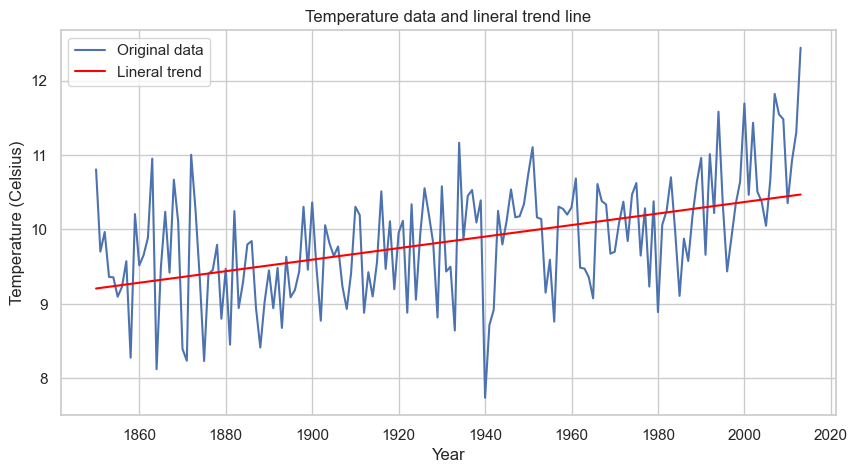

In [98]:

trend = model.predict(x)

future_years = np.array([[2024], [2030], [2035]])
future_temps = model.predict(future_years)

print(f'The temperature in 2025 will be : {future_temps[0].round(2)} Celsius ' )
print(f'The temperature in 2030 will be : {future_temps[1].round(2)} Celsius ' )
print(f'The temperature in 2035 will be : {future_temps[2].round(2)} Celsius ' )

accuracy = model.score(x_test, y_test)
print(f'The accuracy is : {accuracy:.2%}')

plt.figure(figsize=(10, 5))
plt.plot(x1, y1, label='Original data')
plt.plot(x, trend, label='Lineral trend', color='red')
plt.xlabel('Year')
plt.ylabel('Temperature (Celsius)')
plt.title('Temperature data and lineral trend line')
plt.legend()
plt.show()

##### Summary :  
#####  - The model is not a suitable choice for dealing with the complexity of time series data, as it does not take into account the temporal dependence of the data or  seasonal patterns. 
#####  - The model does not provide an accurate estimate and has become inaccurate.

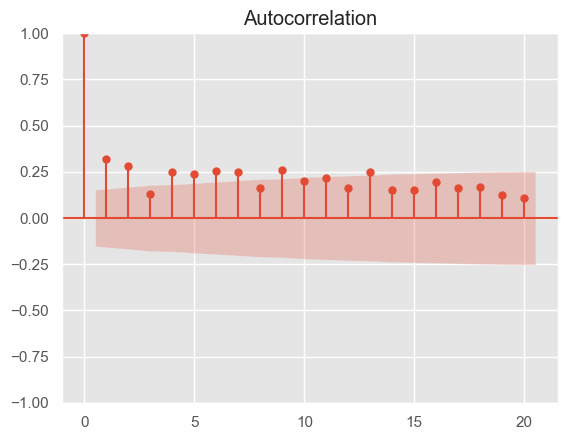

In [131]:

# ACF visualization
plot_acf(df_budapest['AverageTemperature'], lags=20)
plt.show()

# p = 1: Ha a PACF diagram csak az első lag-nál (késleltetésnél) mutat jelentős korrelációt, és utána gyorsan csökken, akkor p = 1 lehet jó választás.

In [127]:


# SARIMA modells with different p values
model_p1 = SARIMAX(df_budapest['AverageTemperature'], order=(1, 1, 1), seasonal_order=(1, 1, 1, 12)).fit()
model_p2 = SARIMAX(df_budapest['AverageTemperature'], order=(2, 1, 1), seasonal_order=(1, 1, 1, 12)).fit()
model_p3 = SARIMAX(df_budapest['AverageTemperature'], order=(3, 1, 1), seasonal_order=(1, 1, 1, 12)).fit()

print('AIC for p=1:', model_p1.aic)
print('AIC for p=2:', model_p2.aic)
print('AIC for p=3:', model_p3.aic)

c:\anaconda\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\anaconda\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


AIC for p=1: 362.16482255919095
AIC for p=2: 364.1092555238979
AIC for p=3: 359.3420281076469


In [121]:

# SARIMA modells with different q values
model_q1 = SARIMAX(df_budapest['AverageTemperature'], order=(1, 1, 1), seasonal_order=(1, 1, 1, 12)).fit()
model_q2 = SARIMAX(df_budapest['AverageTemperature'], order=(1, 1, 2), seasonal_order=(1, 1, 1, 12)).fit()

print('AIC for q=1:', model_q1.aic)
print('AIC for q=2:', model_q2.aic)

AIC for q=1: 362.16482255919095
AIC for q=2: 363.958790179179


c:\anaconda\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


The 1. month predicted temperature is 11.16 Celsius
The 2. month predicted temperature is 10.82 Celsius
The 3. month predicted temperature is 10.74 Celsius
The 4. month predicted temperature is 11.13 Celsius
The 5. month predicted temperature is 11.64 Celsius
The 6. month predicted temperature is 11.44 Celsius
The 7. month predicted temperature is 11.02 Celsius
The 8. month predicted temperature is 11.19 Celsius
The 9. month predicted temperature is 11.22 Celsius
The 10. month predicted temperature is 11.27 Celsius
The 11. month predicted temperature is 11.30 Celsius
The 12. month predicted temperature is 11.03 Celsius


                                     SARIMAX Results                                      
Dep. Variable:                 AverageTemperature   No. Observations:                  164
Model:             SARIMAX(3, 1, 1)x(3, 1, 1, 12)   Log Likelihood                -172.517
Date:                            Sun, 08 Sep 2024   AIC                            363.034
Time:  

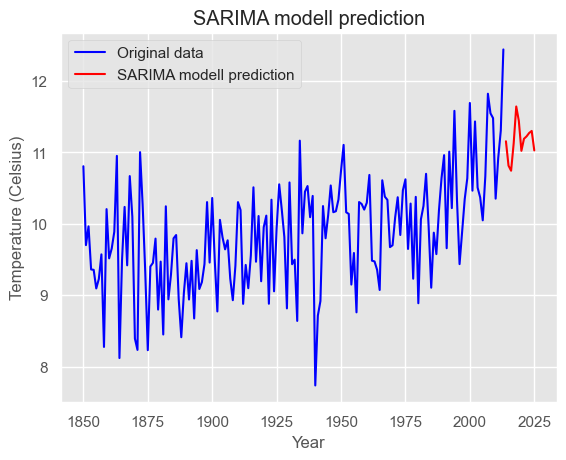

In [129]:

model = SARIMAX(df_budapest['AverageTemperature'], order=(3, 1, 1), seasonal_order=(3, 1, 1, 12))
model_fit = model.fit()

forecast = model_fit.forecast(steps=12) 
for i in range(len(forecast)):
    print(f'The {i+1}. month predicted temperature is {forecast.iloc[i]:.2f} Celsius')

print ('\n')
print(model_fit.summary())

plt.plot(df_budapest['Year'], df_budapest['AverageTemperature'], label='Original data', color = "blue")
plt.plot(range(df_budapest['Year'].max() + 1, df_budapest['Year'].max() + 13), forecast, label='SARIMA modell prediction', color='red')
plt.xlabel('Year')
plt.ylabel('Temperature (Celsius)')
plt.title('SARIMA modell prediction')
plt.legend()
plt.show()

##### Summary :  
##### - The SARIMA model’s forecasts suggest continius warming trend in Budapest, aligning with the broader global warming narrative.